In [39]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Lectura de los archivos csv*** 

In [13]:
Benfs = pd.read_csv('Beneficiarios.csv', sep= '\t',encoding = 'utf-16-le') # Beneficiarios
Comps = pd.read_csv('Complementarios.csv',sep=';') #Complementarios
Contrs = pd.read_csv('Contratos.csv', sep=';') #Contratos 
Serfun = pd.read_csv('SerFun.xls.csv',sep=';') #Servicios funerarios 

In [14]:
print("filas de beneficiarios", Benfs.shape[0])
print("filas de Complementarios", Comps.shape[0])
print("filas de Contratos", Contrs.shape[0])
print("filas de Servicios funerarios", Serfun.shape[0])

filas de beneficiarios 893279
filas de Complementarios 265185
filas de Contratos 391300
filas de Servicios funerarios 40225


In [28]:
Serfun.isna().any()

DocNum                  False
Tipo Prestacion         False
CreateDate              False
DocEntry                 True
Ciudad Fallecimiento     True
Fecha Fallecimiento     False
Edad                    False
Causa                    True
Parentesco               True
dtype: bool

Datos faltantes para los dataset True -> faltan datos, False-> Completo

**Benfs** 

    '#'                    False
    DocEntry               False
    Sexo                    True
    Numero de Documento    False
    Parentesco             False
    Fecha Nacimiento        True
    Fecha Retiro            True
    Fecha Siniestro         True
    Fecha Crea Contrato    False
    
**Comps**

    Docentry               False
    Sexo                    True
    Código Seguro          False
    Nombre Seguro          False
    F. nacimiento           True
    F. retiro compl.        True
    CreateDate             False
    Tipo complementario    False
  
**Contrs**

    Doc entry              False
    Nombre UEN             False
    Nombre Sub UEN         False
    Convenio actual        False
    Nombre Convenio        False
    Fecha real contrato    False
    Numero Contrato         True
    Estado del Contrato    False
    Tipo de Contrato       False
    Codigo plan            False
    Nombre Plan            False
    Sucursal               False

**Serfun**

    DocNum                  False
    Tipo Prestacion         False
    CreateDate              False
    DocEntry                 True
    Ciudad Fallecimiento     True
    Fecha Fallecimiento     False
    Edad                    False
    Causa                    True
    Parentesco               True
    

Columnas de los archivos:
**nombre**- Tipo que debería ser - tipo en los dataset - Definición 

1. **Benfs**
    * **#** - Unique identifier for the review
    * **DocEntry** - INTEGER - int64 - Identificador de los contratos
    * **Sexo** - STRING - object-  Genero del beneficiario
    * **Numero de  Documento** STRING- object-  Documento del beneficiario
    * **Parentesco** STRING- object- Parentesco del beneficiario con el titular del contrato
    * **Fecha Nacimiento** - DATE - object- Fecha de nacimiento del beneficiario
    * **Fecha Retiro** -DATE- object- Fecha de retiro del beneficiario
    * **Fecha Siniestro** DATE- object- Fecha de fallecimiento del beneficiario
    * **Fecha Crea Contrato** -DATE- object- Fecha de ingreso del beneficiario
    
    
2. **Comps**
    * **Docentry** -INTEGER- Identificador de los contratos
    * **Sexo-** STRING -object-  Genero del titular del complementario
    * **Código Seguro** -STRING- object- Codigo interno del complementario
    * **Nombre Seguro** -STRING- object- Nombre del seguro a comercializar
    * **F. nacimiento** -DATE- object- Fecha de nacimiento del titular del complementario
    * **F. retiro compl.** -DATE- object- Fecha de retiro del complementario
    * **CreateDate** -DATE- object- Fecha de creacion del complementario
    * **Tipo complementario** -STRING- object- Clasificacion del complementario
 
    
    
3. **Contrs**
    * **Doc entry** -INTEGER- int64- Identificador de los contratos
    * **Nombre UEN** -STRING- object- Unidad estratigica de negocio (Sector en el cual se comecializa)
    * **Nombre Sub UEN**-STRING- object- Sub Unidad estratigica de negocio (Sector especifico en el cual se comecializa)
    * **Convenio actual** -INTEGER- int64-  Codigo interno de empresa en la que se comercializo
    * **Nombre Convenio** -STRING- object- Nombre de empresa en la que se comercializo
    * **Fecha real contrato** -DATE- object- Fecha en la que se comercializo el contrato
    * **Numero Contrato** -STRING- object- Numero del contrato fisico o digital
    * **Estado del Contrato** -STRING- object- Estado del cliente en la base de datos
    * **Tipo de Contrato** -STRING- object- Clasificacion del contrato según la antigüedad del cliente
    * **Codigo plan** -STRING- object- Codigo interno del plan que se comercializo
    * **Nombre Plan** -STRING- object- Nombre del plan que se comercializo
    * **Sucursal** -STRING- object- Sede en la que se comercizo el contrato
   
4. **Serfun**
    * **DocNum** -INTEGER- int64 -Identificador del servicio funerario
    * **Tipo Prestacion** -STRING- object-  Clasificacion de la prestacion del servicio
    * **CreateDate** -DATE- object- fecha de creacion del servicio en el sistema
    * **DocEntry** -INTEGER- float64-  Identificador de los contratos
    * **Ciudad Fallecimiento** -INTEGER- float64-  Codigo del municipio de fallecimiento
    * **Fecha Fallecimiento** -DATE- object- Fecha de fallecimiento del cliente
    * **Edad** -INTEGER- int64- Edad del fallecido
    * **Causa** -STRING- object- Causal del fellecimiento del cliente
    * **Parentesco** -STRING- object- Parentesco del beneficiario fallecido con el titular del contrato


**Primera exploración para servicios funerarios**

- Encontrar comportamientos para edad, ciudad, causa, fecha fallecimiento
- Explorar el tipo de prestación 
- tomar diagramas de barras para todos en general, luego por ciudad. 



In [29]:
Serfun.isna().any()

DocNum                  False
Tipo Prestacion         False
CreateDate              False
DocEntry                 True
Ciudad Fallecimiento     True
Fecha Fallecimiento     False
Edad                    False
Causa                    True
Parentesco               True
dtype: bool

In [30]:
Serfun.head()
#Causa, se puede llenar con, NO ESPECIFICADA 
#Parentezco, se podría llenar con "OTRO" dada la no especificación 
#DocEntry no tendría relevancia en el momento, será importante cuando se unan tablas 
#Ciudad de fallecimiento, se podrían borrar al momento de realizar el análisis para las ciudades 

#Comenzar con las causas que si se puede llenar 

,DocNum,Tipo Prestacion,CreateDate,DocEntry,Ciudad Fallecimiento,Fecha Fallecimiento,Edad,Causa,Parentesco
0,2002468,Previsión Exequial,10/05/2019,7576.0,11001.0,10/05/2019,26,ACCIDENTAL,HIJO (A)
1,2025926,No Prestado,13/02/2022,463523.0,13430.0,12/02/2022,68,NATURAL,ABUELO (A)
2,2025551,No Prestado,30/01/2022,23746.0,25307.0,30/01/2022,84,NATURAL,MADRE
3,2025373,No Prestado,24/01/2022,49526.0,5001.0,24/01/2022,32,NATURAL,ESPOSO (A)
4,2025790,Particular,7/02/2022,NaN,76001.0,6/02/2022,66,NATURAL,OTRO


In [35]:
Serfun.Causa.unique()
#array(['ACCIDENTAL','NATURAL','COVID 19','SUICIDIO','HOMICIDIO', nan,
# 'SOSPECHA COVID 19', 'EN ESTUDIO']

Serfun['Causa'].fillna('NO ESPECIFICADA', inplace=True)
Serfun.Causa.unique()



array(['ACCIDENTAL', 'NATURAL', 'COVID 19', 'SUICIDIO', 'HOMICIDIO',
       'NO ESPECIFICADA', 'SOSPECHA COVID 19', 'EN ESTUDIO'], dtype=object)

In [38]:
#agrupar por causa de la muerte 
Causas = Serfun.groupby('Causa').size().reset_index()
Causas


,Causa,0
0,ACCIDENTAL,825
1,COVID 19,2586
2,EN ESTUDIO,375
3,HOMICIDIO,813
4,NATURAL,34508
5,NO ESPECIFICADA,137
6,SOSPECHA COVID 19,818
7,SUICIDIO,163


Text(0.5, 1.0, 'Causas de fallecimiento vs total fallecimientos')

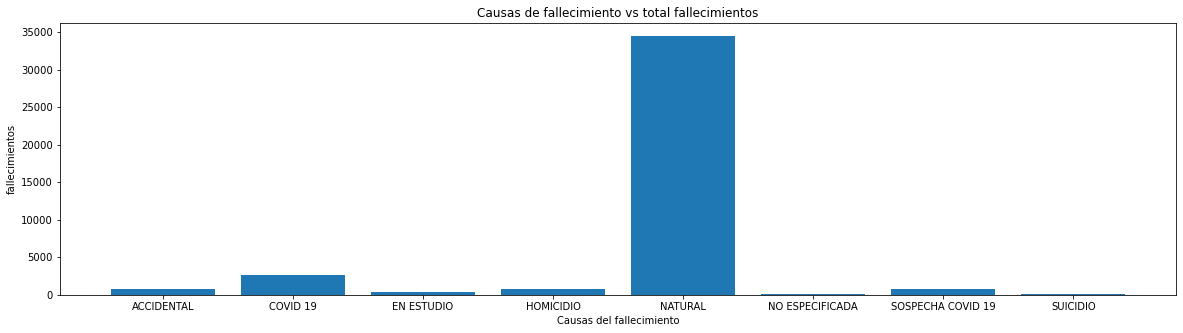

In [41]:
Causas.columns = ["CAUSAS","Total_fallecimientos"] #rename column 
#accident_hour["HOUR"] = accident_hour["HOUR"].astype(str) #the column "HOUR" is transformed to string 

#plot with matplotlib
plt.figure(figsize=(20,5))
plt.bar(Causas["CAUSAS"],Causas["Total_fallecimientos"])
plt.ylabel("fallecimientos")
plt.xlabel("Causas del fallecimiento")
plt.title("Causas de fallecimiento vs total fallecimientos")

**Notas** 
La causa de mayor número de fallecimientos es por causa Natural, la siguiente es por covid 19, seguida por sospecha de covid, accidental y homicidio. la de covid y sospecha de covid deberían disminuir al pasar el tiempo, ya que, la pandemia a ido disminuyendo gracias a la vacunación masiva. estos son datos recopilados a lo largo del tiempo. Será bueno revisar estos tipos de casos en meses  

In [43]:
#Cantidad de muertes por meses 

df_copy  = Serfun.copy()
df_copy["Fecha Fallecimiento"] = pd.to_datetime(df_copy["Fecha Fallecimiento"])
df_copy["MES"] = df_copy["Fecha Fallecimiento"].dt.to_period('M')
MESES = df_copy.groupby("MES").size().reset_index()
MESES

,MES,0
0,2016-01,39
1,2016-02,30
2,2016-03,31
3,2016-04,40
4,2016-05,28
...,...,...
79,2022-08,79
80,2022-09,63
81,2022-10,73
82,2022-11,73


Text(0.5, 1.0, 'MES de fallecimiento vs total fallecimientos')

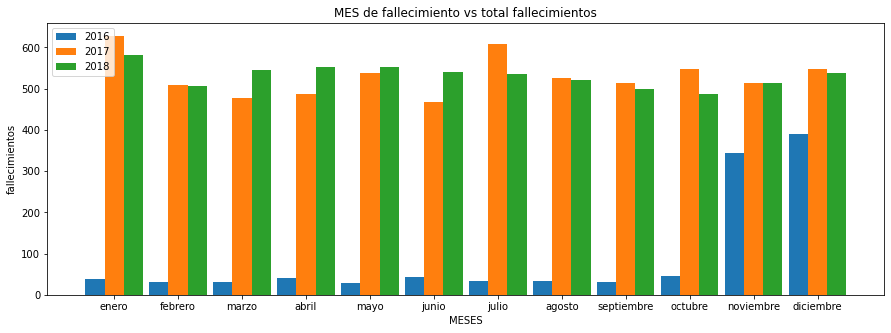

In [83]:
#GRAFICA DE FALLECIMIENTOS POR MES 
MESES.columns = ["MES","Total_fallecimientos"] #rename column 
MESES["MES"] = MESES["MES"].astype(str)
n_grupos = 12
indice_barra = np.arange(n_grupos)
ancho_barra = 0.3
#plot with matplotlib
plt.figure(figsize=(15,5))
plt.bar(indice_barra  ,MESES["Total_fallecimientos"][:12], width = ancho_barra,label="2016")
plt.bar(indice_barra + ancho_barra,MESES["Total_fallecimientos"][12:24], width = ancho_barra, label = "2017")
plt.bar(indice_barra + 2*ancho_barra ,MESES["Total_fallecimientos"][24:36], width = ancho_barra,label="2018")


plt.ylabel("fallecimientos")
plt.xlabel("MESES")
plt.legend(loc='best')
plt.xticks(indice_barra + ancho_barra, ('enero', 'febrero', 'marzo', 'abril','mayo','junio'
                                          ,'julio','agosto','septiembre','octubre','noviembre',
                                         'diciembre'))
plt.title("MES de fallecimiento vs total fallecimientos")

Text(0.5, 1.0, 'MES de fallecimiento vs total fallecimientos')

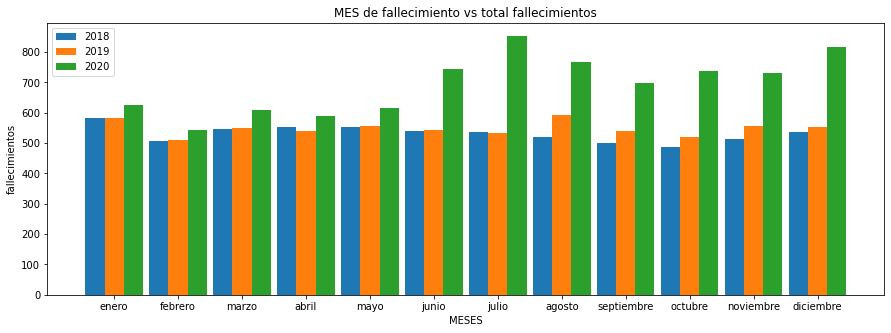

In [84]:
plt.figure(figsize=(15,5))
plt.bar(indice_barra  ,MESES["Total_fallecimientos"][24:36], width = ancho_barra,label="2018")
plt.bar(indice_barra + ancho_barra,MESES["Total_fallecimientos"][36:48], width = ancho_barra, label = "2019")
plt.bar(indice_barra + 2*ancho_barra ,MESES["Total_fallecimientos"][48:60], width = ancho_barra,label="2020")


plt.ylabel("fallecimientos")
plt.xlabel("MESES")
plt.legend(loc='best')
plt.xticks(indice_barra + ancho_barra, ('enero', 'febrero', 'marzo', 'abril','mayo','junio'
                                          ,'julio','agosto','septiembre','octubre','noviembre',
                                         'diciembre'))
plt.title("MES de fallecimiento vs total fallecimientos")

Text(0.5, 1.0, 'MES de fallecimiento vs total fallecimientos')

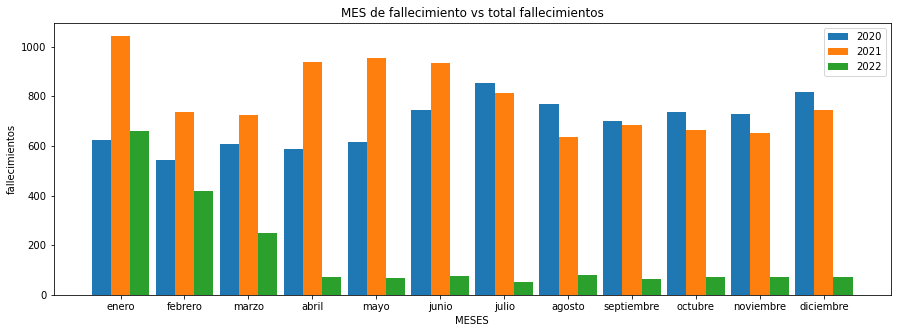

In [86]:
plt.figure(figsize=(15,5))
plt.bar(indice_barra  ,MESES["Total_fallecimientos"][48:60], width = ancho_barra,label="2020")
plt.bar(indice_barra + ancho_barra,MESES["Total_fallecimientos"][60:72], width = ancho_barra, label = "2021")
plt.bar(indice_barra + 2*ancho_barra ,MESES["Total_fallecimientos"][72:84], width = ancho_barra,label="2022")


plt.ylabel("fallecimientos")
plt.xlabel("MESES")
plt.legend(loc='best')
plt.xticks(indice_barra + ancho_barra, ('enero', 'febrero', 'marzo', 'abril','mayo','junio'
                                          ,'julio','agosto','septiembre','octubre','noviembre',
                                         'diciembre'))
plt.title("MES de fallecimiento vs total fallecimientos")